<a href="https://colab.research.google.com/github/kenithleon/computer-vison-prg/blob/main/Matching%20Between%20Images%20Using%20ORB%20and%20RANSAC%20" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

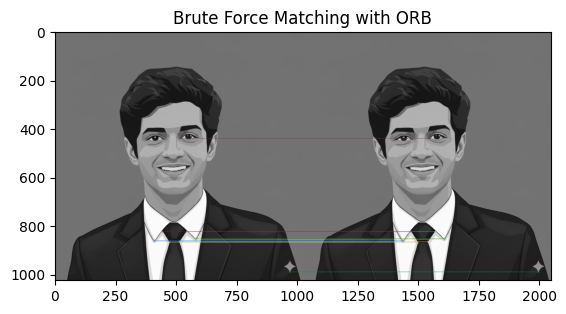

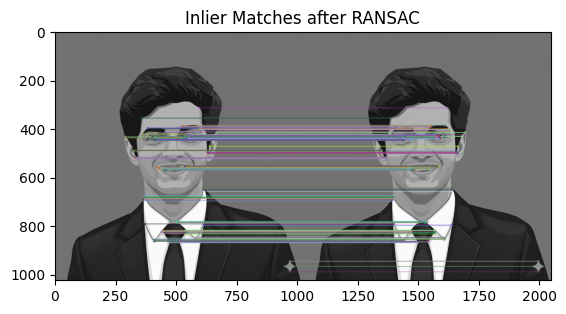

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the images
img1 = cv2.imread('/content/Gemini_Generated_Image_hi586ghi586ghi58.png', cv2.IMREAD_GRAYSCALE) # Image 1
img2 = cv2.imread('/content/Gemini_Generated_Image_hi586ghi586ghi58.png', cv2.IMREAD_GRAYSCALE) # Image 2
# Check if the images are loaded properly
if img1 is None or img2 is None:
    print("Could not open or find the images.")
    exit()
# Initialize ORB detector
orb = cv2.ORB_create()
# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw the top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Display the matches
plt.imshow(img_matches)
plt.title('Brute Force Matching with ORB')
plt.show()
# Applying RANSAC to filter the matches
# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)

pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
# Find the fundamental matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
# Select inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# Draw the inlier matches
img_inliers = cv2.drawMatches(img1, kp1, img2, kp2, [m for i, m in enumerate(matches) if mask[i]],
None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Display the inlier matches
plt.imshow(img_inliers)
plt.title('Inlier Matches after RANSAC')
plt.show()